In [ ]:
# FACULTATIF
# à utiliser dans google colab
# uploader un fichier local depuis l'ordinateur

#from google.colab import files
#uploaded = files.upload()    # sélectionner eco2mix_clean.csv

Saving eco2mix_clean.csv to eco2mix_clean.csv


# Préparation de l'environnement et du fichier

In [46]:
# Import des bibliothèques nécessaires
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.dtypes.common import is_numeric_dtype
from matplotlib.ticker import ScalarFormatter

# Lecture du fichier CSV
df = pd.read_csv("eco2mix_clean.csv", sep=',', low_memory=False)

# Affichage flottant plus lisible
np.set_printoptions(suppress=True)    # Affichage sans notation scientifique (ex : 1.23e+05 devient 123000.00)
pd.set_option('display.float_format', lambda x: '%.2f' % x)    # Affichage des nombres à virgule avec 2 décimales dans les DataFrames
pd.set_option('display.max_columns', None)    # Affiche toutes les colonnes du DataFrame dans le notebook (même si elles sont nombreuses)

# Conversion des types
df['Date'] = pd.to_datetime(df['Date'])  # colonne Date -> datetime
df['Code INSEE région'] = df['Code INSEE région'].astype('str')  # colonne Code INSEE -> string

# Aperçu du DataFrame
df.head()


,Code INSEE région,Région,Date,JourSemaine,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),PROD,CONSO,Année_mois,Année,Mois
0,11,Île-de-France,2013-01-01,1,399392.00,32478.00,508590.97,340.00,100.00,0.00,117.50,6333.00,360051.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,547841.97,399274.50,2013-01,2013,1
1,11,Île-de-France,2013-01-02,2,492157.00,33589.00,532984.06,83.00,121.00,0.00,96.00,6016.00,452266.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,572793.06,492061.00,2013-01,2013,1
2,11,Île-de-France,2013-01-03,3,487111.00,42885.00,531158.23,120.00,16.00,0.00,1152.00,6136.00,437869.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,580315.23,485959.00,2013-01,2013,1
3,11,Île-de-France,2013-01-04,4,470053.00,34260.00,527388.41,12.00,15.00,0.00,15600.00,6273.00,429408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,567948.41,454453.00,2013-01,2013,1
4,11,Île-de-France,2013-01-05,5,433732.00,33634.00,521453.96,4.00,13.00,0.00,96.00,6585.00,393424.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,561689.96,433636.00,2013-01,2013,1


In [47]:
# le fichier contient des valeurs pour les années complètes de 2013 à 2022, mais l'année 2023 ne comporte qu'un mois
# cela peut fausser les analyses qui suivront car ce ne sera pas représentatif, nous supprimons les valeurs de cette année là
df_aft_2023 =  df.loc[df.Date.dt.year >= 2023].index
df = df.drop(df_aft_2023, axis = 0)

In [48]:
# personnalisation des couleurs avec notre thème 
colors = ['#240a85', '#5930f2', '#27DCE0', '#DBA02A']
colors_r = colors[::-1]
colors_blue_purple = ['#240a85', '#A428DD', "#D796F6"]
colors_paired = [ '#5930f2', '#27DCE0','#A428DD', '#DBA02A', '#240a85', '#6f5344','#6f42c1', '#107C41',  "#494A4A","#D796F6", "#B0AFAD",  "#0A9698"]

sns.set_theme(palette=sns.color_palette(colors_paired))

gradient_palette = sns.blend_palette(colors, n_colors=60)
gradient_palette_r = sns.blend_palette(colors_r, n_colors=60)
gradient_blue_purple = sns.blend_palette(colors_blue_purple, n_colors=12)
gradient_blue_purple_r = sns.blend_palette(colors_blue_purple[::-1], n_colors=12)

In [49]:
# Répartir les colonnes en 3 groupes : numériques, catégorielles et temporelles pour faciliter les manipulations ensuite
col_num = [
    'Consommation (MW)', 'Nucléaire (MW)', 'Thermique (MW)', 'Eolien (MW)',
    'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)', 'Pompage (MW)', 'Ech. physiques (MW)',
    'TCO Nucléaire (%)', 'TCH Nucléaire (%)',
    'TCO Thermique (%)', 'TCH Thermique (%)',
    'TCO Eolien (%)', 'TCH Eolien (%)',
    'TCO Hydraulique (%)', 'TCH Hydraulique (%)',
    'TCO Solaire (%)', 'TCH Solaire (%)',
    'TCO Bioénergies (%)', 'TCH Bioénergies (%)',
    'PROD', 'CONSO'
]

col_cat = ['Code INSEE région', 'Région']

col_temp = ['Date', 'JourSemaine', 'Année_mois', 'Année', 'Mois']

# Groupes spécifiques : regroupement des colonnes de TCH, de TCO, de MW, de production d'énergie, et de production d'énergies renouvelables
col_TCH = ['TCH Nucléaire (%)','TCH Thermique (%)','TCH Eolien (%)','TCH Hydraulique (%)','TCH Solaire (%)','TCH Bioénergies (%)']

col_TCO = ['TCO Nucléaire (%)','TCO Thermique (%)','TCO Eolien (%)','TCO Hydraulique (%)','TCO Solaire (%)','TCO Bioénergies (%)']

col_MW = [
    'Consommation (MW)', 'Nucléaire (MW)', 'Thermique (MW)', 'Eolien (MW)',
    'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)', 'Pompage (MW)', 'Ech. physiques (MW)'
]

col_production = ['Nucléaire (MW)', 'Thermique (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)']

col_renouvelables = ['Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)']


# Statistiques descriptives : analyse des variables numériques

In [50]:
# Analyse des variables numériques

# On affiche les statistiques descriptives de toutes les colonnes numériques : min, max, moyenne, écart-type, quartiles, etc.
df[col_num].describe().T

# Interprétation :

# La consommation moyenne est d’environ 214 415 MW, avec un maximum de 656 890 MW. Cela indique des pics importants à certaines périodes.
# Le nucléaire est de loin la principale source de production (moyenne ~283 950 MW), suivi par le thermique (~18 284 MW) et l’hydraulique (~28 249 MW).
# La production solaire et bioénergies est plus faible (moyennes de  4 666 MW et 4 072 MW).
# Le pompage a une moyenne positive (3 939 MW) : les valeurs ont déjà été remises en valeur absolue lors du nettoyage.
# Les échanges physiques sont très variables, allant de -533 963 à +585 849 MW, ce qui montre l’intensité des importations/exportations entre régions.

# Les colonnes TCH (%) (taux de charge) respectent bien leur obligations d'être ≤ 100 %. Par exemple, TCH Nucléaire max = 100 % et TCH Solaire = 34.22 %.
# Cela confirme que les anomalies > 100 % ont été corrigées lors du nettoyage précédent.

# Les colonnes TCO (%) (taux de couverture) peuvent logiquement dépasser 100 % :
# TCO Nucléaire (%) atteint 664.94 %, ce qui indique une très forte production nucléaire excédentaire dans certaines régions qui exportent leur électricité vers d'autres régions.
# Même chose pour TCO Eolien (102.19 %), donc il y a parfois une surproduction locale.

# Enfin, les colonnes PROD et CONSO montrent une bonne cohérence :
# La production moyenne est supérieure à la consommation moyenne (351 823 MW vs 210 476 MW), ce qui indique un excédent global d'énergie.
# Cet excédent indique une redistribution de l'énergie produite entre régions françaises.


,count,mean,std,min,25%,50%,75%,max
Consommation (MW),43824.00,214414.70,101102.91,59592.00,131977.75,196810.00,275905.25,656890.00
Nucléaire (MW),43824.00,283949.52,159269.70,0.00,164010.62,294206.23,411308.79,651959.00
Thermique (MW),43824.00,18284.33,24950.62,0.00,1267.75,8093.50,24374.25,183730.00
Eolien (MW),43824.00,12603.57,19704.85,0.00,1994.00,6028.50,14918.50,230038.00
Solaire (MW),43824.00,4666.12,6320.41,0.00,805.00,2039.00,5951.00,51206.00
Hydraulique (MW),43824.00,28248.56,46455.78,0.00,294.00,3439.00,41859.25,281005.00
Bioénergies (MW),43824.00,4071.84,2154.63,236.00,2356.00,3692.50,5613.00,14916.00
Pompage (MW),43824.00,3938.80,7905.11,0.00,0.00,278.85,4793.25,75233.00
Ech. physiques (MW),43824.00,-21188.16,204246.58,-533963.00,-199393.75,25573.00,104621.75,585849.00
TCO Nucléaire (%),43824.00,31.01,77.73,0.00,0.00,0.00,0.00,664.94


<Axes: >

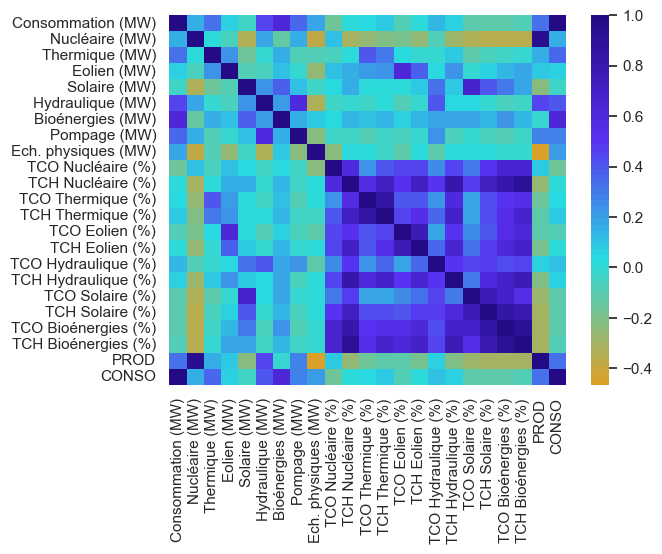

In [51]:
# Matrice de corrélation entre les valeurs numériques
sns.heatmap(df[col_num].corr(),
            cmap=gradient_palette_r)        # palette de couleur comme dans le rapport

# Interprétation :
# La matrice de corrélation montre en bleu foncé qu’il y a des corrélations fortes à modérées entre :
#
# - la production totale et la production nucléaire, et hydraulique dans une moindre mesure,
#   ce qui pourrait être expliqué par l’importance de ces deux filières de production
#   dans la production totale ;
#
# - le TCO éolien et la production éolienne ou le TCO nucléaire et la production nucléaire,
#   ce qui s’explique par le fait que lorsque la production augmente, le taux de couverture
#   des régions par cette filière est meilleur ; les paires TCO - TCH de la plupart des filières
#   sont elles aussi corrélées, pour la même raison.
#
# L’éolien et le solaire, des énergies renouvelables, ne sont quasiment pas corrélés.
# Cela peut signifier qu’elles sont indépendantes et aléatoires, fortement influencées par la météo.
#
# Globalement, les corrélations sont plutôt faibles dans notre jeu de données,
# ce qui pourrait témoigner de la diversité et de la complémentarité des sources d’énergies.


# Evolution de la production et de la consommation

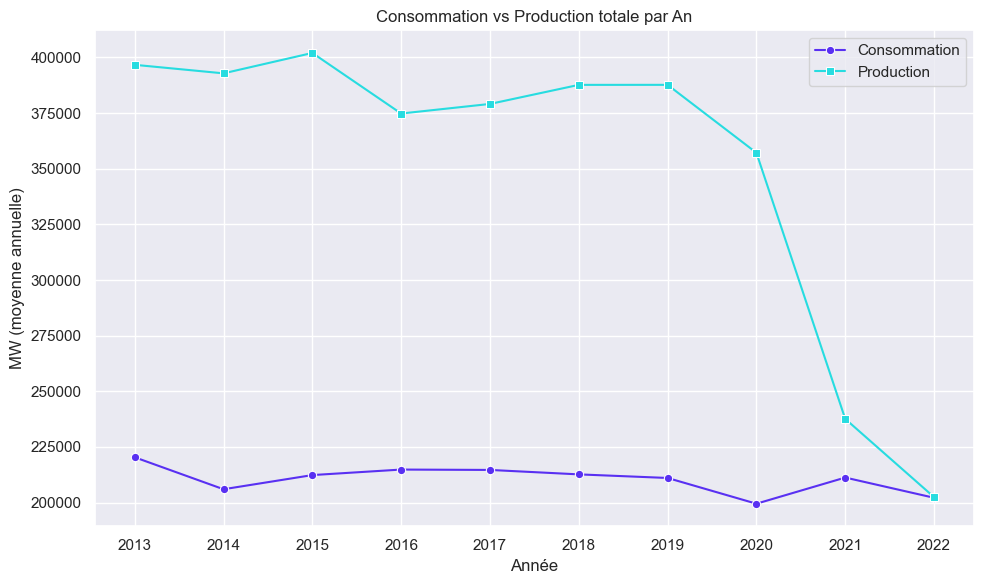

In [52]:
# Consommation vs Production totale par an
# Calcul de la moyenne par an
df_An = df.groupby('Année')[['CONSO', 'PROD']].mean().reset_index()

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_An, x='Année', y='CONSO', marker='o', label='Consommation')
sns.lineplot(data=df_An, x='Année', y='PROD', marker='s', label='Production')

plt.title("Consommation vs Production totale par An")
plt.xlabel("Année")
plt.ylabel("MW (moyenne annuelle)")
plt.xticks(range(2013, 2023))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

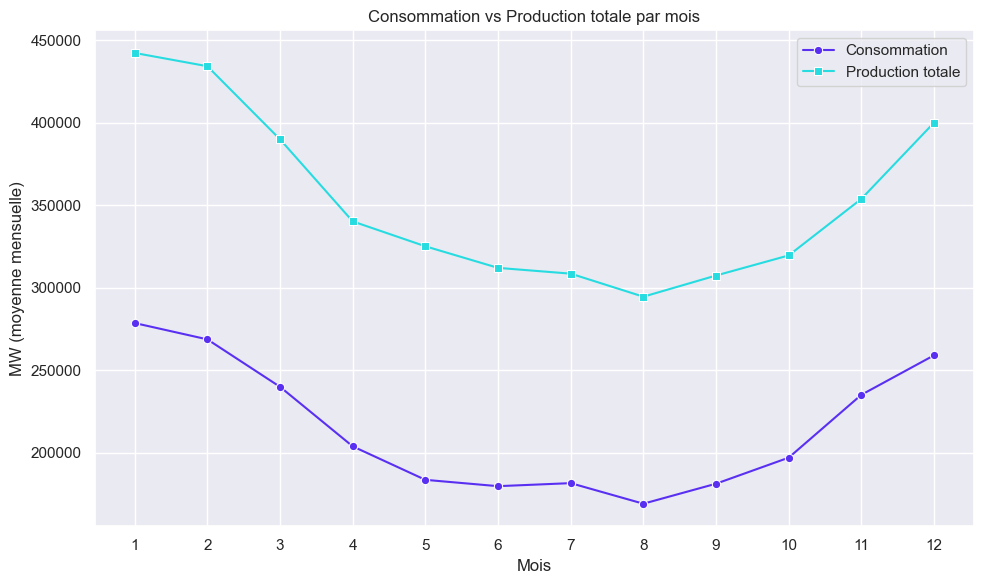

In [53]:
# Consommation vs Production totale par mois
# Calcul de la moyenne par mois
df_mois = df.groupby('Mois')[['Consommation (MW)', 'PROD']].mean().reset_index()

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mois, x='Mois', y='Consommation (MW)', marker='o', label='Consommation')
sns.lineplot(data=df_mois, x='Mois', y='PROD', marker='s', label='Production totale')

plt.title("Consommation vs Production totale par mois")
plt.xlabel("Mois")
plt.ylabel("MW (moyenne mensuelle)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# comme on peut s'y attendre la consommation est au plus haut pendant les mois d'hiver, et baisse en été

# Répartition régionale

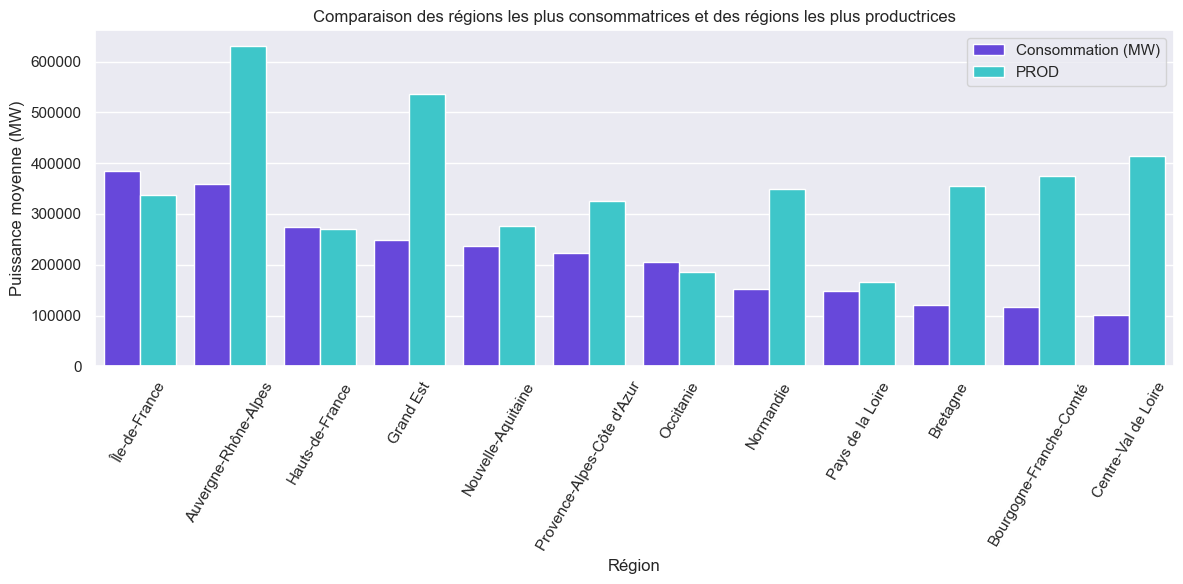

In [55]:
# Régions les plus consommatrices et régions les plus productrices
# Objectif métier : identifier les régions qui consomment beaucoup d'énergie et les régions productrices nettes, pour prévoir les échanges d'énergie entre les régions.
# ça permet de savoir quelles régions ne sont pas autonomes en production d'énergie et ont besoin de l'énergie des autres régions.

# 1 : Regrouper par région
region_stats = (
    df.groupby("Région")[["Consommation (MW)", "PROD"]]
    .mean()
    .sort_values("Consommation (MW)", ascending=False)
    .reset_index()
)

# 2 : Initialisation du tracé
plt.figure(figsize=(12,6))

# Fusionner les données pour utiliser hue
region_stats_melted = region_stats.melt(id_vars="Région", value_vars=["Consommation (MW)", "PROD"],
                                        var_name="Type", value_name="Valeur")

# Créer le graphique
sns.barplot(data=region_stats_melted, x="Région", y="Valeur", hue="Type")

plt.xticks(rotation=60)
plt.ylabel("Puissance moyenne (MW)")
plt.title("Comparaison des régions les plus consommatrices et des régions les plus productrices")
plt.legend()
plt.tight_layout()
plt.show()

# Le graphique montre que des régions comme l’Auvergne-Rhône-Alpes, le Grand Est et le Centre-Val de Loire produisent beaucoup plus d’électricité qu’elles n’en consomment.
# D'autres régions comme la Provence-Alpes-Côte d’Azur ou la Normandie par exemple produisent légèrement plus qu'elles ne consomment.
# Les Hauts-de-France sont à l'équilibre.
# L’Île-de-France consomment plus qu’elle ne produit à cause de sa forte population et son activité économique, donc elle est dépendante de l'électricité des autres régions, qui lui est acheminée par le réseau.

C:\Users\NicolasJACQUET\AppData\Local\Temp\ipykernel_4568\3016054293.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_stats, x="Région", y="Ratio", palette=gradient_blue_purple)


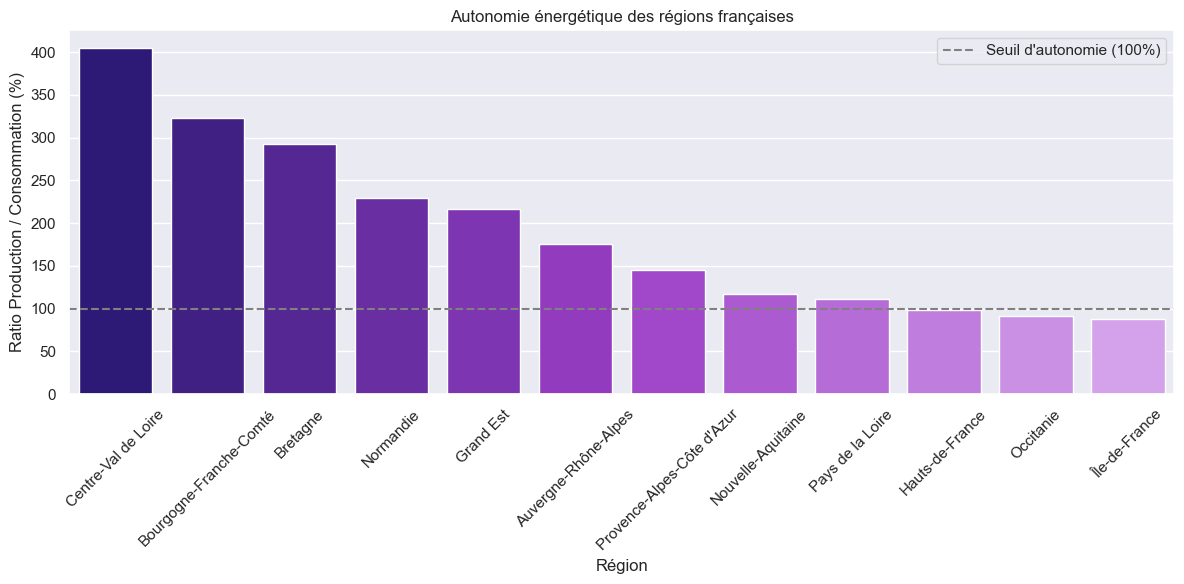

In [56]:
# Ratio Production / Consommation par région
# Objectif métier : visualiser l’autonomie énergétique régionale,
# donc voir si une région produit suffisamment pour couvrir sa propre consommation.

# Calculer le ratio
region_stats["Ratio"] = region_stats["PROD"] / region_stats["Consommation (MW)"] * 100

# Trier du plus excédentaire au plus déficitaire
region_stats = region_stats.sort_values("Ratio", ascending=False)

# Tracer
plt.figure(figsize=(12, 6))
sns.barplot(data=region_stats, x="Région", y="Ratio", palette=gradient_blue_purple)
plt.axhline(100, color="gray", linestyle="--", label="Seuil d'autonomie (100%)")
plt.xticks(rotation=45)
plt.ylabel("Ratio Production / Consommation (%)")
plt.title("Autonomie énergétique des régions françaises")
plt.legend()
plt.tight_layout()
plt.show()

# Nous voyons que les régions productrices nettes sont par exemple le Centre-Val de Loire et la Normandie,
# dont la production dépasse largement leur consommation.
# À l’inverse, l’Île-de-France a un ratio très inférieur à 100 % :
# elle dépend des apports extérieurs d'électricité pour couvrir sa consommation.


# Impact de la population sur la consommation et la  production d'énergie

In [57]:
# Lecture du fichier CSV dans un DataFrame
population_df = pd.read_csv("populations-ofgl-regions.csv", sep=';')

# Vérification des colonnes disponibles
print("Colonnes disponibles :", population_df.columns.tolist())

# Aperçu rapide
population_df.head()


Colonnes disponibles : ['Exercice', 'type', 'insee', 'Région', 'Population municipale', 'Population totale', 'siren', 'Code Courant Officiel', 'Code Région', 'outre_mer', 'Est une CTU', 'annee_texte']


,Exercice,type,insee,Région,Population municipale,Population totale,siren,Code Courant Officiel,Code Région,outre_mer,Est une CTU,annee_texte
0,2012,Région,83,Auvergne,1343964,1385690,236300018,84,83,Non,Non,2012
1,2012,Région,24,Centre,2538590,2609814,234500023,24,24,Non,Non,2012
2,2012,Région,21,Champagne-Ardenne,1337953,1376019,235100013,44,21,Non,Non,2012
3,2012,Région,3,Guyane,224469,226426,239730013,3,3,Oui,Oui,2012
4,2012,Région,11,Île-de-France,11728240,11877121,237500079,11,11,Non,Non,2012


In [58]:
# préparation

#  pour chaque région, on additionne toute la production et toute la consommation (sur toute la période) pour n’avoir qu’une seule ligne par région.
df_energy_by_region = df.groupby('Région')[['PROD', 'CONSO']].sum().reset_index()

# Garder uniquement la dernière année par région,pour ne pas avoir trop de résultats
population_latest = population_df.sort_values('annee_texte').drop_duplicates(subset='Région', keep='last')

#  garder uniquement les colonnes utiles : Région et Population totale.
population_latest = population_latest[['Région', 'Population totale']]

# je fusionne les deux DataFrames :
df_merged = pd.merge(df_energy_by_region, population_latest, on='Région', how='inner')

# trier les régions de la plus petite à la plus grande population
df_merged = df_merged.sort_values(by='Population totale')

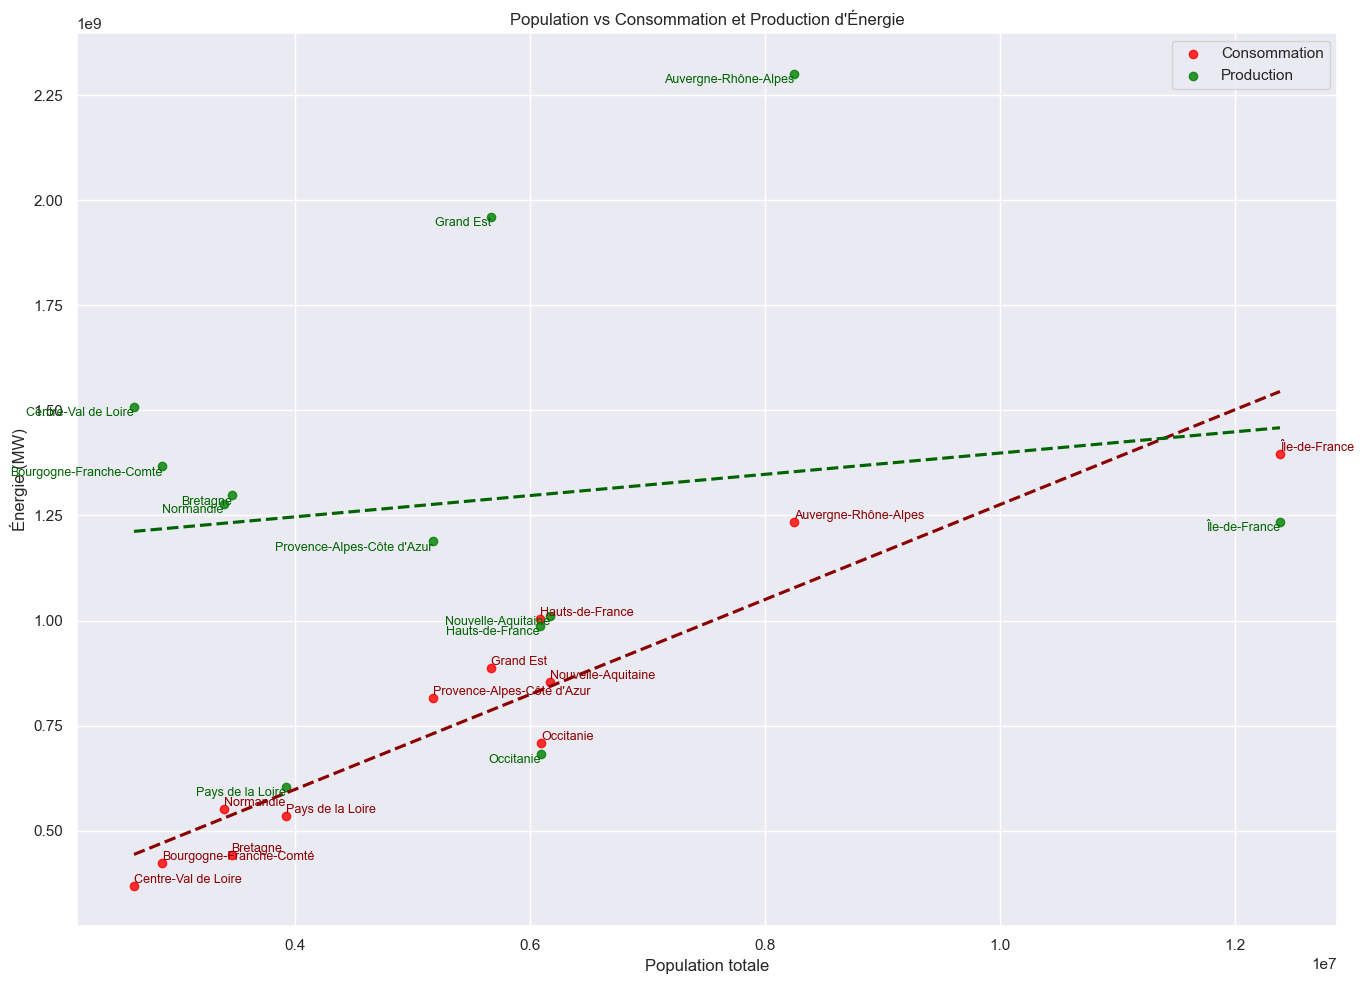

In [59]:
# Affichage

plt.figure(figsize=(14, 10))

# Ajouter les noms des régions sur les points
for i, row in df_merged.iterrows():
    plt.text(row['Population totale'], row['CONSO'], row['Région'], fontsize=9, color='darkred', ha='left', va='bottom')
    plt.text(row['Population totale'], row['PROD'], row['Région'], fontsize=9, color='darkgreen', ha='right', va='top')

# Points et droite pour la consommation
sns.regplot(
    data=df_merged,
    x='Population totale',
    y='CONSO',
    scatter_kws={'color': 'red'},
    line_kws={'color': 'darkred', 'linestyle': '--'},
    ci=None,
    label='Consommation'
)

# Points et droite pour la production
sns.regplot(
    data=df_merged,
    x='Population totale',
    y='PROD',
    scatter_kws={'color': 'green'},
    line_kws={'color': 'darkgreen', 'linestyle': '--'},
    ci=None,
    label='Production'
)

# Mise en forme
plt.title("Population vs Consommation et Production d'Énergie")
plt.xlabel("Population totale")
plt.ylabel("Énergie (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Ce graphique permet de voir si la population d'une région influence sa consommation et sa production d’énergie.
# On remarque que la consommation suit une tendance très liée à la population : plus une région est peuplée, plus elle consomme.
# En revanche, la production varie davantage : certaines régions très peuplées (Île-de-France) produisent peu, tandis que d’autres moins peuplées (Centre-Val de Loire, Grand Est) produisent beaucoup.
# Cela peut être dû à la localisation des centrales (ex : nucléaire ou hydraulique).




C:\Users\NicolasJACQUET\AppData\Local\Temp\ipykernel_4568\1892611015.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_cons, x='Région', y='Conso par Hab (MW)',


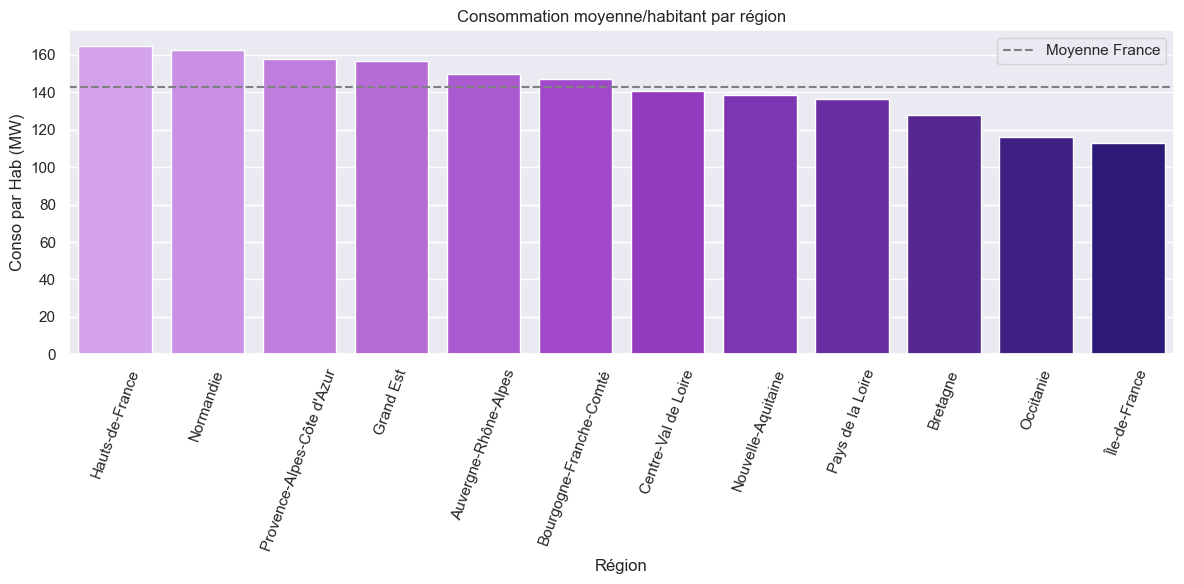

In [60]:
# Ajouter la consommation par habitant dans df_merged
df_merged['Conso par Hab (MW)'] = df_merged['CONSO'] / df_merged['Population totale']

# Calculer la moyenne de consommation par habitant par région
mean_cons = df_merged.groupby('Région')['Conso par Hab (MW)'].mean()

# Trier par ordre décroissant
order = mean_cons.sort_values(ascending=False).index.tolist()
mean_cons = pd.DataFrame(mean_cons)

# Histogramme
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_cons, x='Région', y='Conso par Hab (MW)', 
            order=order, palette=gradient_blue_purple_r)
plt.axhline(mean_cons['Conso par Hab (MW)'].mean(), color="gray", linestyle="--", label="Moyenne France")
plt.xticks(rotation=70)
plt.title("Consommation moyenne/habitant par région")
plt.legend()
plt.tight_layout()
plt.show()


# Qualification du mix énergétique

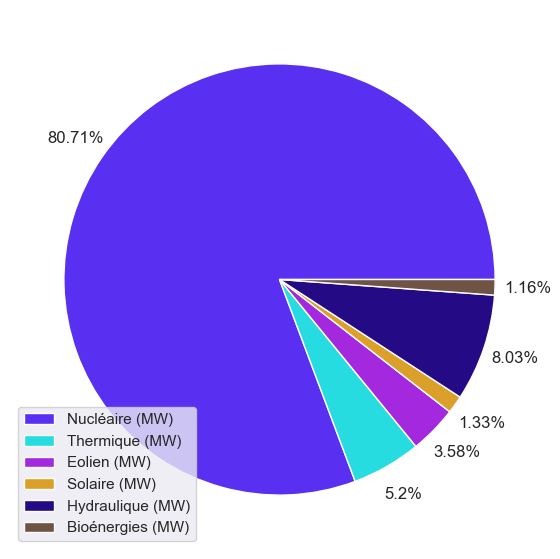

In [61]:
# Répartition moyenne du mix énergétique
# Objectif métier : voir la part de chaque filière (nucléaire, hydraulique, solaire, etc.) dans la production d’électricité totale.

# Extraire les colonnes de production
df_production = df[col_production]

# Calculer les moyennes de chaque filière
moyennes = df_production.mean()

# Camembert
labels = moyennes.index
explode = [0.1] + [0]*5

plt.figure(figsize=(7, 7))
plt.pie(
    moyennes,
        autopct=lambda x: str(round(x, 2)) + '%',
        pctdistance=1.15)
plt.legend(labels=labels)
plt.show()

# La production électrique repose principalement sur le nucléaire, qui représente presque 80 % du mix en moyenne.
# Les autres sources (hydraulique, thermique, éolien, solaire et bioénergies) ont un rôle complémentaire, avec une montée progressive des énergies renouvelables.


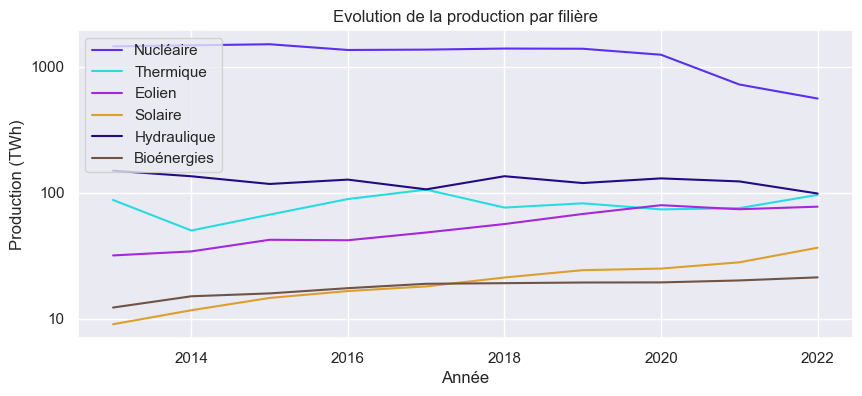

In [111]:
# Evolution de la production par filière

# Liste des filières à tracer
filières = ['Nucléaire (MW)', 'Thermique (MW)', 'Eolien (MW)',
            'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)']

# Grouper par année et calculer la somme annuelle par filière
prod_par_an = df.groupby('Année')[filières].sum()

#conversion en TWh
data = prod_par_an/1000000
data = data.rename({'Nucléaire (MW)' :'Nucléaire' , 
                    'Thermique (MW)' : 'Thermique',
                    'Bioénergies (MW)' : 'Bioénergies',
             'Solaire (MW)' : 'Solaire',
             'Eolien (MW)' : 'Eolien',
             'Hydraulique (MW)':'Hydraulique'}, axis=1)

# Création du graphique
ax = data.plot(kind='line', figsize=(10,4), logy=True,)
plt.legend(loc='upper left')
plt.ylabel('Production (TWh)')
plt.title('Evolution de la production par filière')
ax.yaxis.set_major_formatter(ScalarFormatter())  # désactive la notation scientifique
ax.ticklabel_format(style='plain', axis='y')    # pour afficher en format décimal


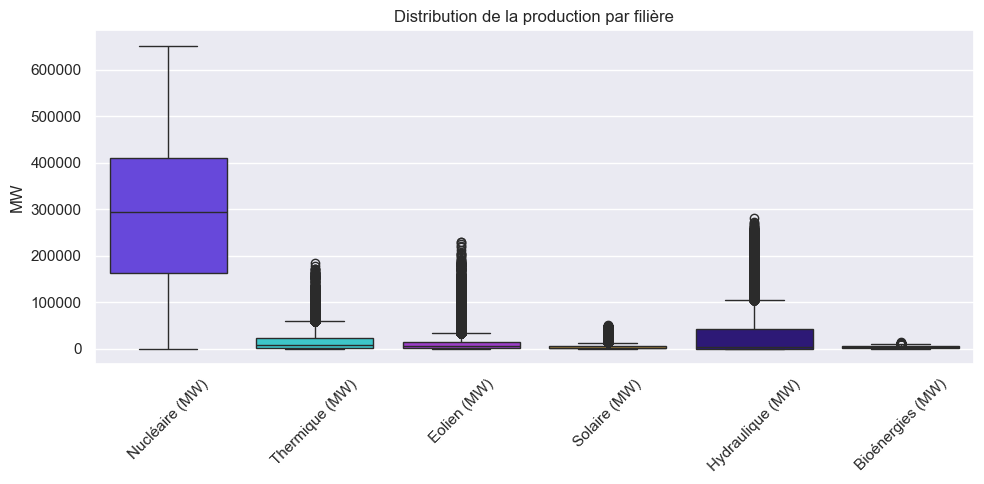

In [110]:
#Box plot des productions par filières
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[col_production])
plt.title('Distribution de la production par filière')
plt.ylabel('MW')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

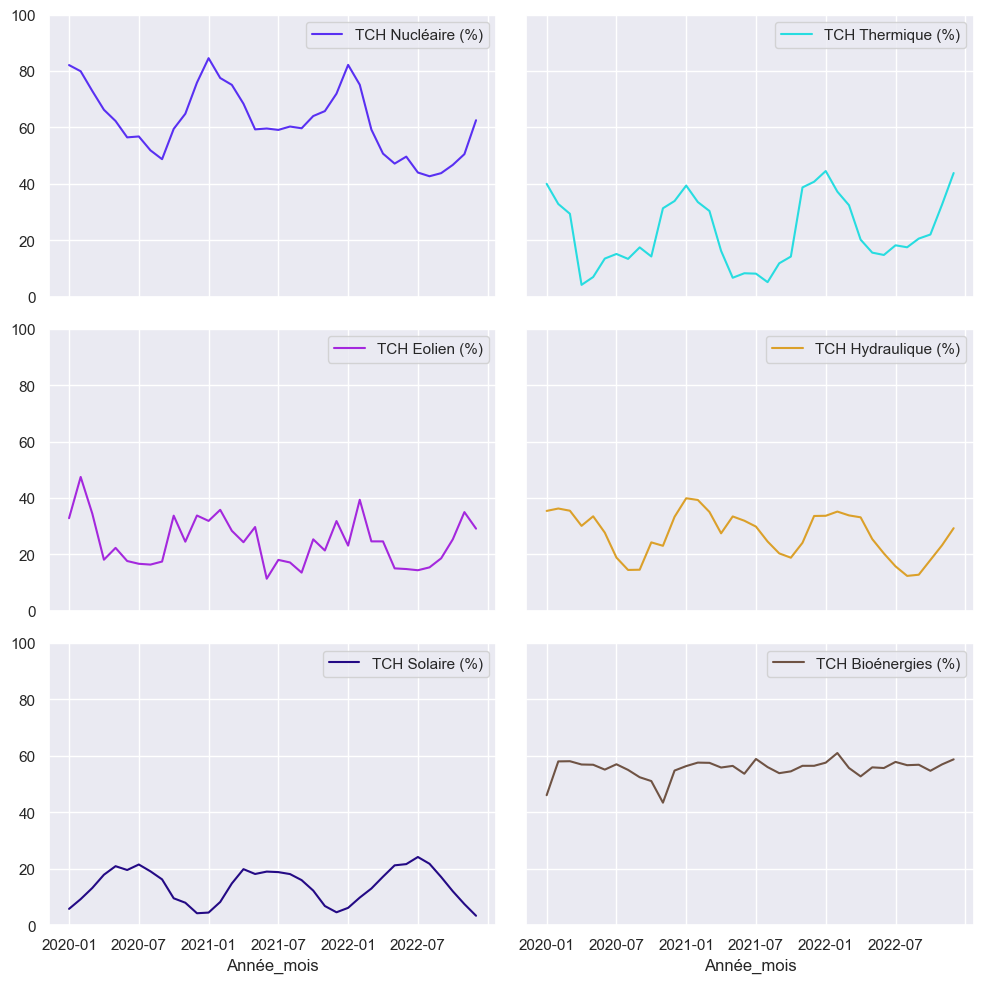

In [79]:
# Evolution mensuelle des taux de charge horaires (TCH) par filière
data = pd.concat((df[col_TCH], df[col_temp]), axis=1)

# 1 : Filtrer à partir de Janvier 2020
data = data.loc[data.Année >= 2020]

# 1 : Calcul des moyennes mensuelles par filière
data = data.groupby('Année_mois')[['Année', 'Mois', 'TCH Nucléaire (%)','TCH Thermique (%)',
                                   'TCH Eolien (%)','TCH Hydraulique (%)','TCH Solaire (%)','TCH Bioénergies (%)'
                                   ]].mean()
labels = data.index

# 3 : Création du graphique
data[['TCH Nucléaire (%)','TCH Thermique (%)',
      'TCH Eolien (%)','TCH Hydraulique (%)','TCH Solaire (%)','TCH Bioénergies (%)'
      ]].plot(legend=True ,kind='line', figsize=(10,10), subplots=True,
              layout=(3,2) ,sharey=True, ylim=(0,100), xticks=(0,6,12,18,24,30, 36))
plt.tight_layout()

# Focus sur les énergies renouvelables

Text(0, 0.5, 'Energie produite (TWh)')

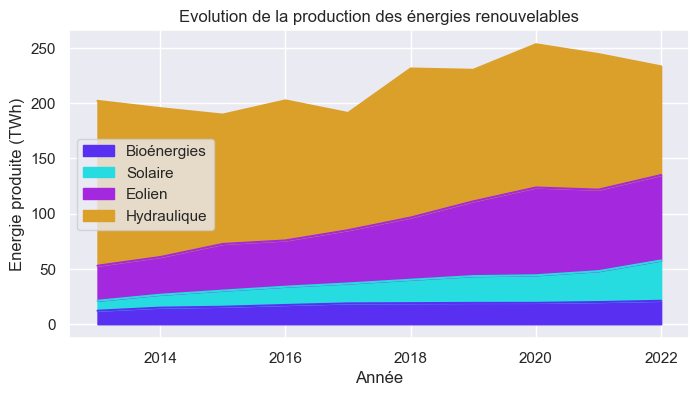

In [81]:
# Tendance de production des énergies renouvelables

# Tendance de production des énergies renouvelables
data = pd.concat((df[col_renouvelables], df[col_temp]), axis=1)
data = data.groupby('Année')[['Bioénergies (MW)','Solaire (MW)','Eolien (MW)',	'Hydraulique (MW)']].sum()
#conversion en TWh
data = data/1000000
data = data.rename({'Bioénergies (MW)' : 'Bioénergies',
             'Solaire (MW)' : 'Solaire',
             'Eolien (MW)' : 'Eolien',
             'Hydraulique (MW)':'Hydraulique'}, axis=1)

data.plot(legend=True ,kind='area', figsize=(8,4))
plt.title('Evolution de la production des énergies renouvelables')
plt.ylabel('Energie produite (TWh)')
# on voit que la production de bioénergies reste assez stable, le solaire et éolien augmentent et l'hydraulique est plus instable (années de sécheresses ?)

# On observe que la production de bioénergies reste relativement stable au fil des années.
# La production solaire et éolienne est en augmentation, montrant le développement de ces filières renouvelables.
# En revanche, la production hydraulique indique une grande variabilité d'une année à l'autre,
# probablement dûe aux conditions climatiques (sécheresses, précipitations...).



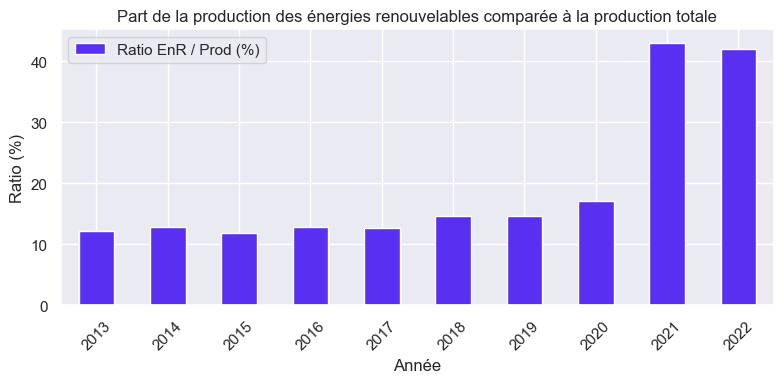

In [87]:
# Tendance de production des énergies renouvelables vs production totale
data = pd.concat([df[col_renouvelables], df[col_temp], df[['PROD']]], axis=1)

# Somme des EnR
data['EnR'] = data['Eolien (MW)'] + data['Solaire (MW)'] + data['Hydraulique (MW)'] + data['Bioénergies (MW)']

# Ratio EnR sur production totale
data['Ratio EnR / Prod (%)'] = data['EnR'] / data['PROD'] * 100

# Moyenne annuelle
data = data.groupby('Année')[['Ratio EnR / Prod (%)']].mean()

# Graphique
data.plot(
    kind='bar',
    legend=True,
    figsize=(8,4)
)
plt.title("Part de la production des énergies renouvelables comparée à la production totale")
plt.ylabel("Ratio (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# on voit que la part de la production de bioénergies augmente significativement


Text(0, 0.5, 'Energie produite (TWh)')

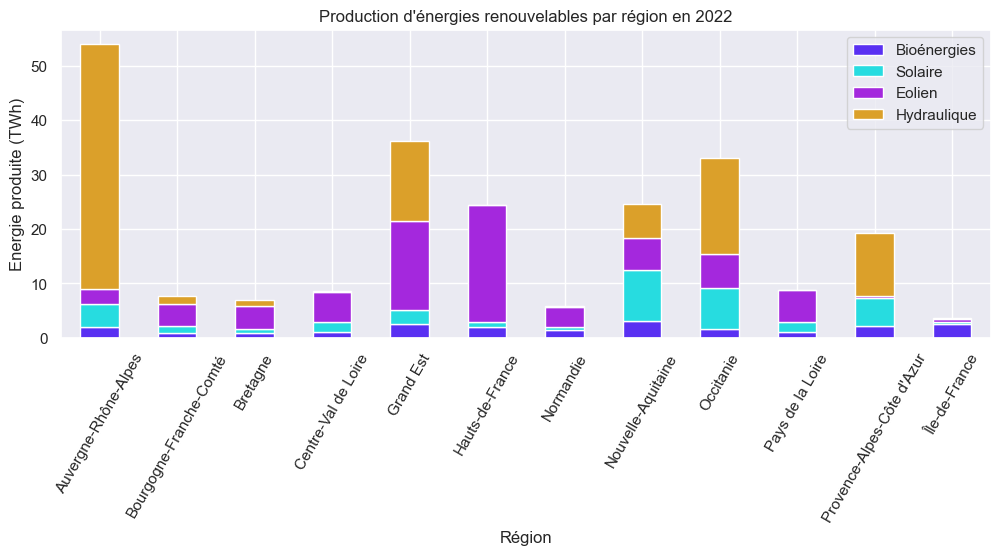

In [108]:
# Production d'énergies renouvelables par région

# 1: on prend uniquement les données de la dernière année
data = pd.concat((df[col_renouvelables], df[col_temp], df['PROD'],  df['Région']), axis=1)
data = data.loc[data.Année == 2022]

# 1 : Agréger par région
data = data.groupby(['Région'])[['Bioénergies (MW)','Solaire (MW)','Eolien (MW)',	'Hydraulique (MW)', 'PROD']].sum()

# convertir en TW
data = data/1000000

# renommer les colonnes pour enlever l'unité 
data = data.rename({'Bioénergies (MW)' : 'Bioénergies',
             'Solaire (MW)' : 'Solaire',
             'Eolien (MW)' : 'Eolien',
             'Hydraulique (MW)':'Hydraulique'}, axis=1)

# tracer le graphe
data[['Bioénergies',	'Solaire',	'Eolien',	'Hydraulique']].plot(kind='bar',figsize=(12,4), stacked=True)
plt.xticks(rotation=60)
plt.title('Production d\'énergies renouvelables par région en 2022')
plt.ylabel('Energie produite (TWh)')


Text(0, 0.5, 'Energie produite (TWh)')

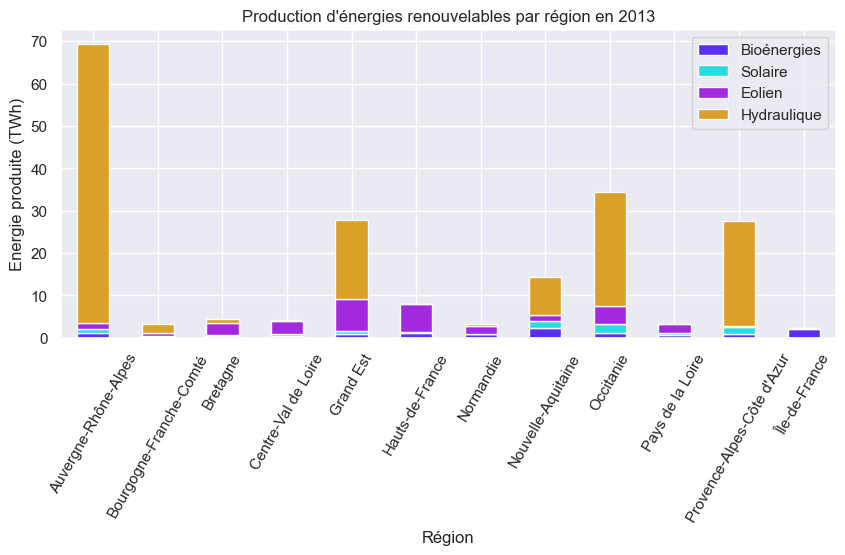

In [109]:
# Production d'énergies renouvelables par région --- avant 2019

# 1: on prend uniquement les données de la dernière année
data = pd.concat((df[col_renouvelables], df[col_temp], df['PROD'],  df['Région']), axis=1)
data = data.loc[data.Année == 2013]

# 1 : Agréger par région
data = data.groupby(['Région'])[['Bioénergies (MW)','Solaire (MW)','Eolien (MW)',	'Hydraulique (MW)', 'PROD']].sum()

# convertir en TW
data = data/1000000

# renommer les colonnes pour enlever l'unité 
data = data.rename({'Bioénergies (MW)' : 'Bioénergies',
             'Solaire (MW)' : 'Solaire',
             'Eolien (MW)' : 'Eolien',
             'Hydraulique (MW)':'Hydraulique'}, axis=1)

# tracer le graphe
data[['Bioénergies',	'Solaire',	'Eolien',	'Hydraulique']].plot(kind='bar',figsize=(10,4), stacked=True)
plt.xticks(rotation=60)
plt.title('Production d\'énergies renouvelables par région en 2013')
plt.ylabel('Energie produite (TWh)')
